# **KASDD F1 Lap time - Biasa Aja**

# Import Dataset

In [138]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as scp
import scipy.cluster.hierarchy as shc
import datetime
import time

from decimal import Decimal
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, SelectKBest, mutual_info_regression, SelectPercentile, mutual_info_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import RepeatedStratifiedKFold


f1_data = pd.read_csv("f1_train.csv")
f1_data = f1_data.drop(axis=1, columns=["ID"])
f1_data

,Time,LapTime,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,...,Deleted,DeletedReason,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,0 days 02:26:25.496000,0 days 00:01:40.943000,6.0,0 days 02:25:08.325000,NaN,0 days 00:00:46.163000,0 days 00:00:28.979000,0 days 00:00:25.801000,0 days 02:25:36.926000,0 days 02:26:05.905000,...,False,NaN,17.1,68.0,1008.0,False,24.8,157,3.0,Participant
1,0 days 01:13:51.732000,0 days 00:01:48.067000,1.0,NaN,NaN,0 days 00:00:39.129000,0 days 00:00:43.601000,0 days 00:00:25.337000,0 days 01:12:42.794000,0 days 01:13:26.395000,...,False,NaN,25.0,49.0,1008.5,False,43.3,275,1.0,Podium
2,0 days 02:22:35.139000,0 days 00:01:22.881000,2.0,NaN,NaN,0 days 00:00:28.890000,0 days 00:00:18.554000,0 days 00:00:35.437000,0 days 02:21:41.150000,0 days 02:21:59.704000,...,False,NaN,17.6,57.0,1018.2,False,29.9,0,0.6,Participant
3,0 days 01:03:36.822000,0 days 00:01:31.585000,1.0,0 days 00:14:44.885000,NaN,NaN,0 days 00:00:28.929000,0 days 00:00:30.478000,NaN,0 days 01:03:06.412000,...,False,NaN,17.6,67.0,1007.7,False,29.5,135,1.8,Podium
4,0 days 01:45:40.072000,0 days 00:01:34.742000,2.0,NaN,NaN,0 days 00:00:34.895000,0 days 00:00:29.874000,0 days 00:00:29.973000,0 days 01:44:40.174000,0 days 01:45:10.048000,...,False,NaN,26.1,55.0,1011.0,False,31.0,271,1.3,Point
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,0 days 01:27:00.913000,0 days 00:01:25.235000,2.0,NaN,NaN,0 days 00:00:30.620000,0 days 00:00:30.668000,0 days 00:00:23.947000,0 days 01:26:06.294000,0 days 01:26:36.962000,...,False,NaN,29.3,32.0,988.4,False,49.9,252,1.2,Participant
18784,0 days 01:21:32.309000,0 days 00:01:40.363000,1.0,NaN,NaN,0 days 00:00:29.488000,0 days 00:00:42.838000,0 days 00:00:28.037000,0 days 01:20:21.469000,0 days 01:21:04.307000,...,False,NaN,30.0,72.0,1009.0,False,36.8,145,1.1,Participant
18785,0 days 02:00:31.678000,0 days 00:01:52.495000,3.0,NaN,NaN,0 days 00:00:32.659000,0 days 00:00:49.567000,0 days 00:00:30.269000,0 days 01:59:11.871000,0 days 02:00:01.438000,...,False,NaN,17.6,66.0,966.7,False,30.3,146,1.1,Participant
18786,0 days 01:07:59.947000,0 days 00:01:25.938000,1.0,NaN,NaN,0 days 00:00:30.564000,0 days 00:00:31.370000,0 days 00:00:24.004000,0 days 01:07:04.556000,0 days 01:07:35.926000,...,False,NaN,28.8,33.0,988.5,False,50.1,134,1.5,Participant


In [139]:
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   PitOutTime          1039 non-null   object 
 4   PitInTime           735 non-null    object 
 5   Sector1Time         18381 non-null  object 
 6   Sector2Time         18749 non-null  object 
 7   Sector3Time         18696 non-null  object 
 8   Sector1SessionTime  18344 non-null  object 
 9   Sector2SessionTime  18749 non-null  object 
 10  Sector3SessionTime  18696 non-null  object 
 11  SpeedI1             15871 non-null  float64
 12  SpeedI2             18749 non-null  float64
 13  SpeedFL             18013 non-null  float64
 14  SpeedST             17096 non-null  float64
 15  IsPersonalBest      18758 non-null  object 
 16  Comp

# Preprocessing

In [140]:
def cek_duplicates(df):
    if df.duplicated().sum() > 0:
        print("Terdapat", df.duplicated().sum(), "pasang data yang redundan")
        display(df[df.duplicated()])
    else:
        print("Tidak ada data yang redundan")

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

def cek_outlier(df):
    df_numerical = df.select_dtypes(include=['float64', 'int64']) 
    Q1 = df_numerical.quantile(0.25, numeric_only=True)
    Q3 = df_numerical.quantile(0.75, numeric_only=True)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df_numerical < lower_limit) | (df_numerical > upper_limit)

    # Menghitung dan menampilkan persentase outlier pada tiap atribut.
    percentage_outliers = (outliers.sum() / len(df)) * 100
    print("Persentase Outlier pada tiap atribut:")
    print(percentage_outliers)

### Handling Missing Value

In [141]:
cek_null(f1_data)

                    Total    Percent
IsPersonalBest         30   0.159676
SpeedI2                39   0.207579
Sector2SessionTime     39   0.207579
Sector2Time            39   0.207579
Sector3SessionTime     92   0.489674
Sector3Time            92   0.489674
LapTime               290   1.543538
Sector1Time           407   2.166276
Sector1SessionTime    444   2.363211
SpeedFL               775   4.124973
SpeedST              1692   9.005748
SpeedI1              2917  15.525868
PitOutTime          17749  94.469874
PitInTime           18053  96.087928
DeletedReason       18477  98.344688


> Atribut `PitOutTime`, `PitInTime`, dan `DeletedReason` memiliki persentase jumlah missing value mencapai lebih dari 90%. Oleh karena itu, atribut-atribut tersebut perlu di drop.

In [142]:
f1_data = f1_data.drop(axis=1, columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

In [143]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    print('#'*50)
    df.info()
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    numerics = ['SpeedI2', 'SpeedFL', 'SpeedST', 'SpeedI1']
    for col in numerics:
        df_feature = f1_data[col]
        plt.figure(figsize=(10,5))
        plt.title(f'Distribusi data {col}')
        sns.kdeplot(df_feature, fill=True)
        plt.show()
    print("Menampilkan Modus dari data kategorikal")
    categoricals = ["IsPersonalBest", "Sector2SessionTime", "Sector2Time","Sector3SessionTime", "Sector3Time", "LapTime", "Sector1Time", "Sector1SessionTime"]
    for col in categoricals:
        print(f"Mode for {col} = {f1_data[col].mode()[0]}")

Menampilkan informasi dataset dan tipe data
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   Sector1Time         18381 non-null  object 
 4   Sector2Time         18749 non-null  object 
 5   Sector3Time         18696 non-null  object 
 6   Sector1SessionTime  18344 non-null  object 
 7   Sector2SessionTime  18749 non-null  object 
 8   Sector3SessionTime  18696 non-null  object 
 9   SpeedI1             15871 non-null  float64
 10  SpeedI2             18749 non-null  float64
 11  SpeedFL             18013 non-null  float64
 12  SpeedST             17096 non-null  float64
 13  IsPersonalBest      18758 non-null  object 
 14  Compoun

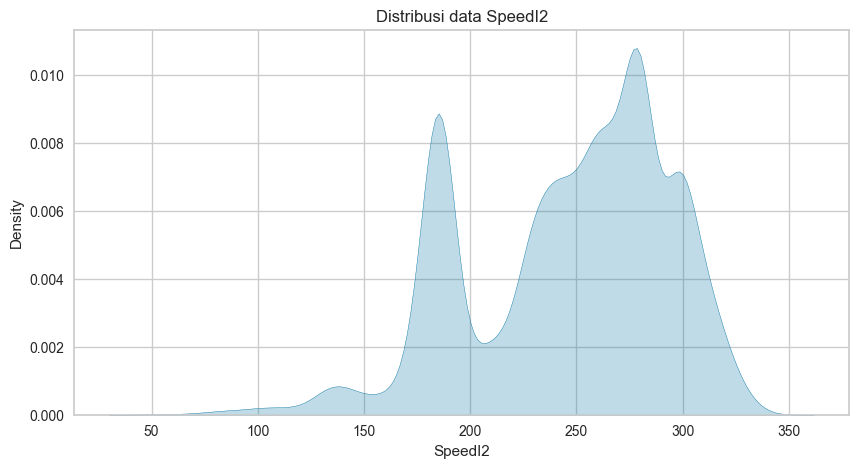

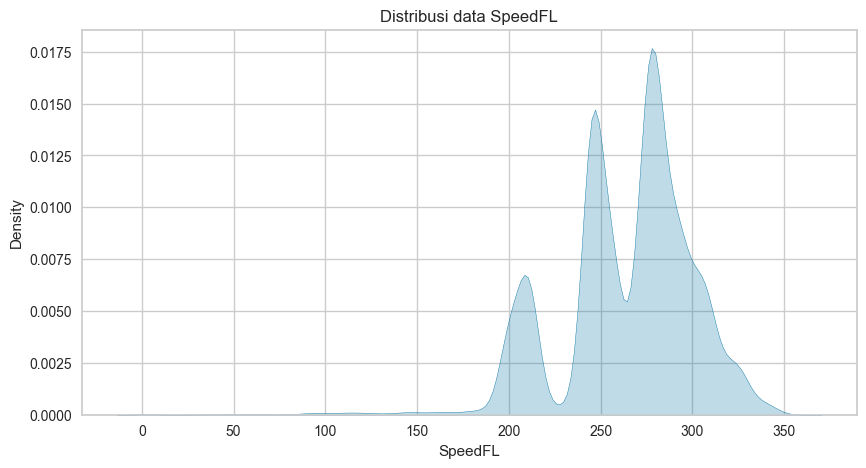

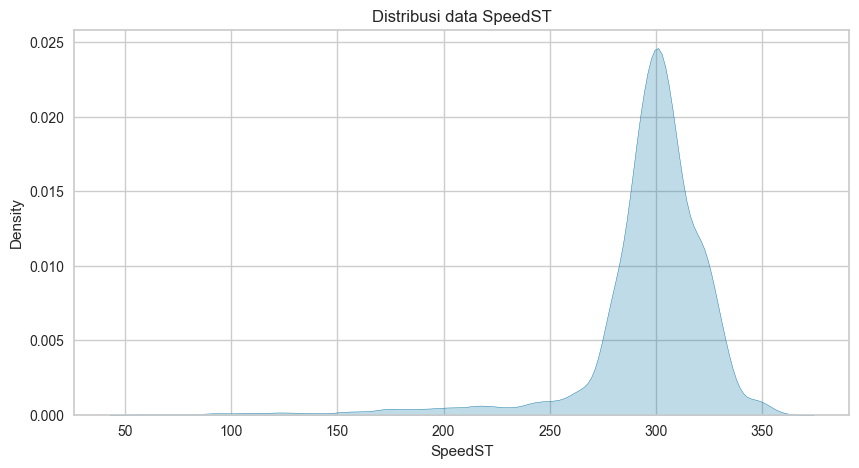

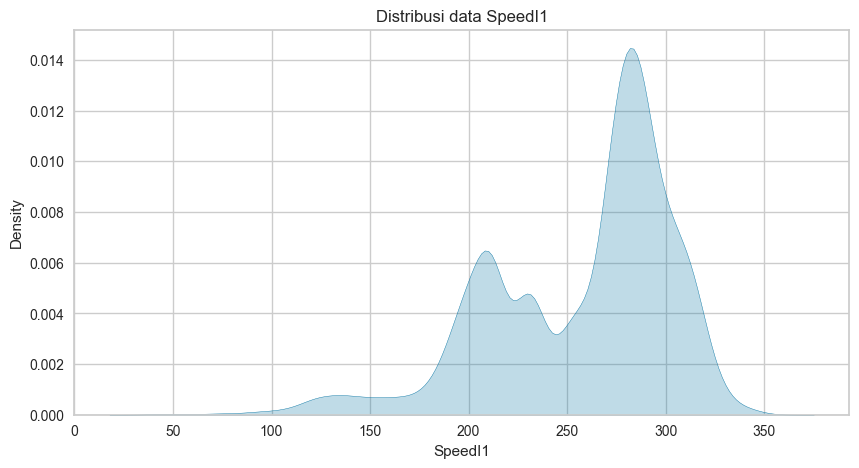

Menampilkan Modus dari data kategorikal
Mode for IsPersonalBest = False
Mode for Sector2SessionTime = 0 days 01:03:29.878000
Mode for Sector2Time = 0 days 00:00:29.905000
Mode for Sector3SessionTime = 0 days 01:06:09.122000
Mode for Sector3Time = 0 days 00:00:25.692000
Mode for LapTime = 0 days 00:01:16.993000
Mode for Sector1Time = 0 days 00:00:28.315000
Mode for Sector1SessionTime = 0 days 01:04:58.279000


In [144]:
show_data_type_and_distribution(f1_data)

In [145]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [146]:
f1_data['SpeedI2'] = fill_null_median(f1_data['SpeedI2'])
f1_data['SpeedFL'] = fill_null_median(f1_data['SpeedFL'])
f1_data['SpeedST'] = fill_null_mean(f1_data['SpeedST'])
f1_data['SpeedI1'] = fill_null_median(f1_data['SpeedI1'])
f1_data['IsPersonalBest'] = fill_null_mode(f1_data['IsPersonalBest'])
f1_data['Sector2SessionTime'] = fill_null_mode(f1_data['Sector2SessionTime'])
f1_data['Sector2Time'] = fill_null_mode(f1_data['Sector2Time'])
f1_data['Sector3SessionTime'] = fill_null_mode(f1_data['Sector3SessionTime'])
f1_data['Sector3Time'] = fill_null_mode(f1_data['Sector3Time'])
f1_data['LapTime'] = fill_null_mode(f1_data['LapTime'])
f1_data['Sector1Time'] = fill_null_mode(f1_data['Sector1Time'])
f1_data['Sector1SessionTime'] = fill_null_mode(f1_data['Sector1SessionTime'])

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_22504\129334964.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_df = df.fillna(mode)


In [147]:
cek_null(f1_data)

Tidak ditemukan missing value pada dataset


### Handling Duplicate Value

In [148]:
print("Jumlah duplikasi data : " + str(f1_data.duplicated().sum()))

Jumlah duplikasi data : 1


In [149]:
f1_data = f1_data.drop_duplicates()

### Handling Outliers

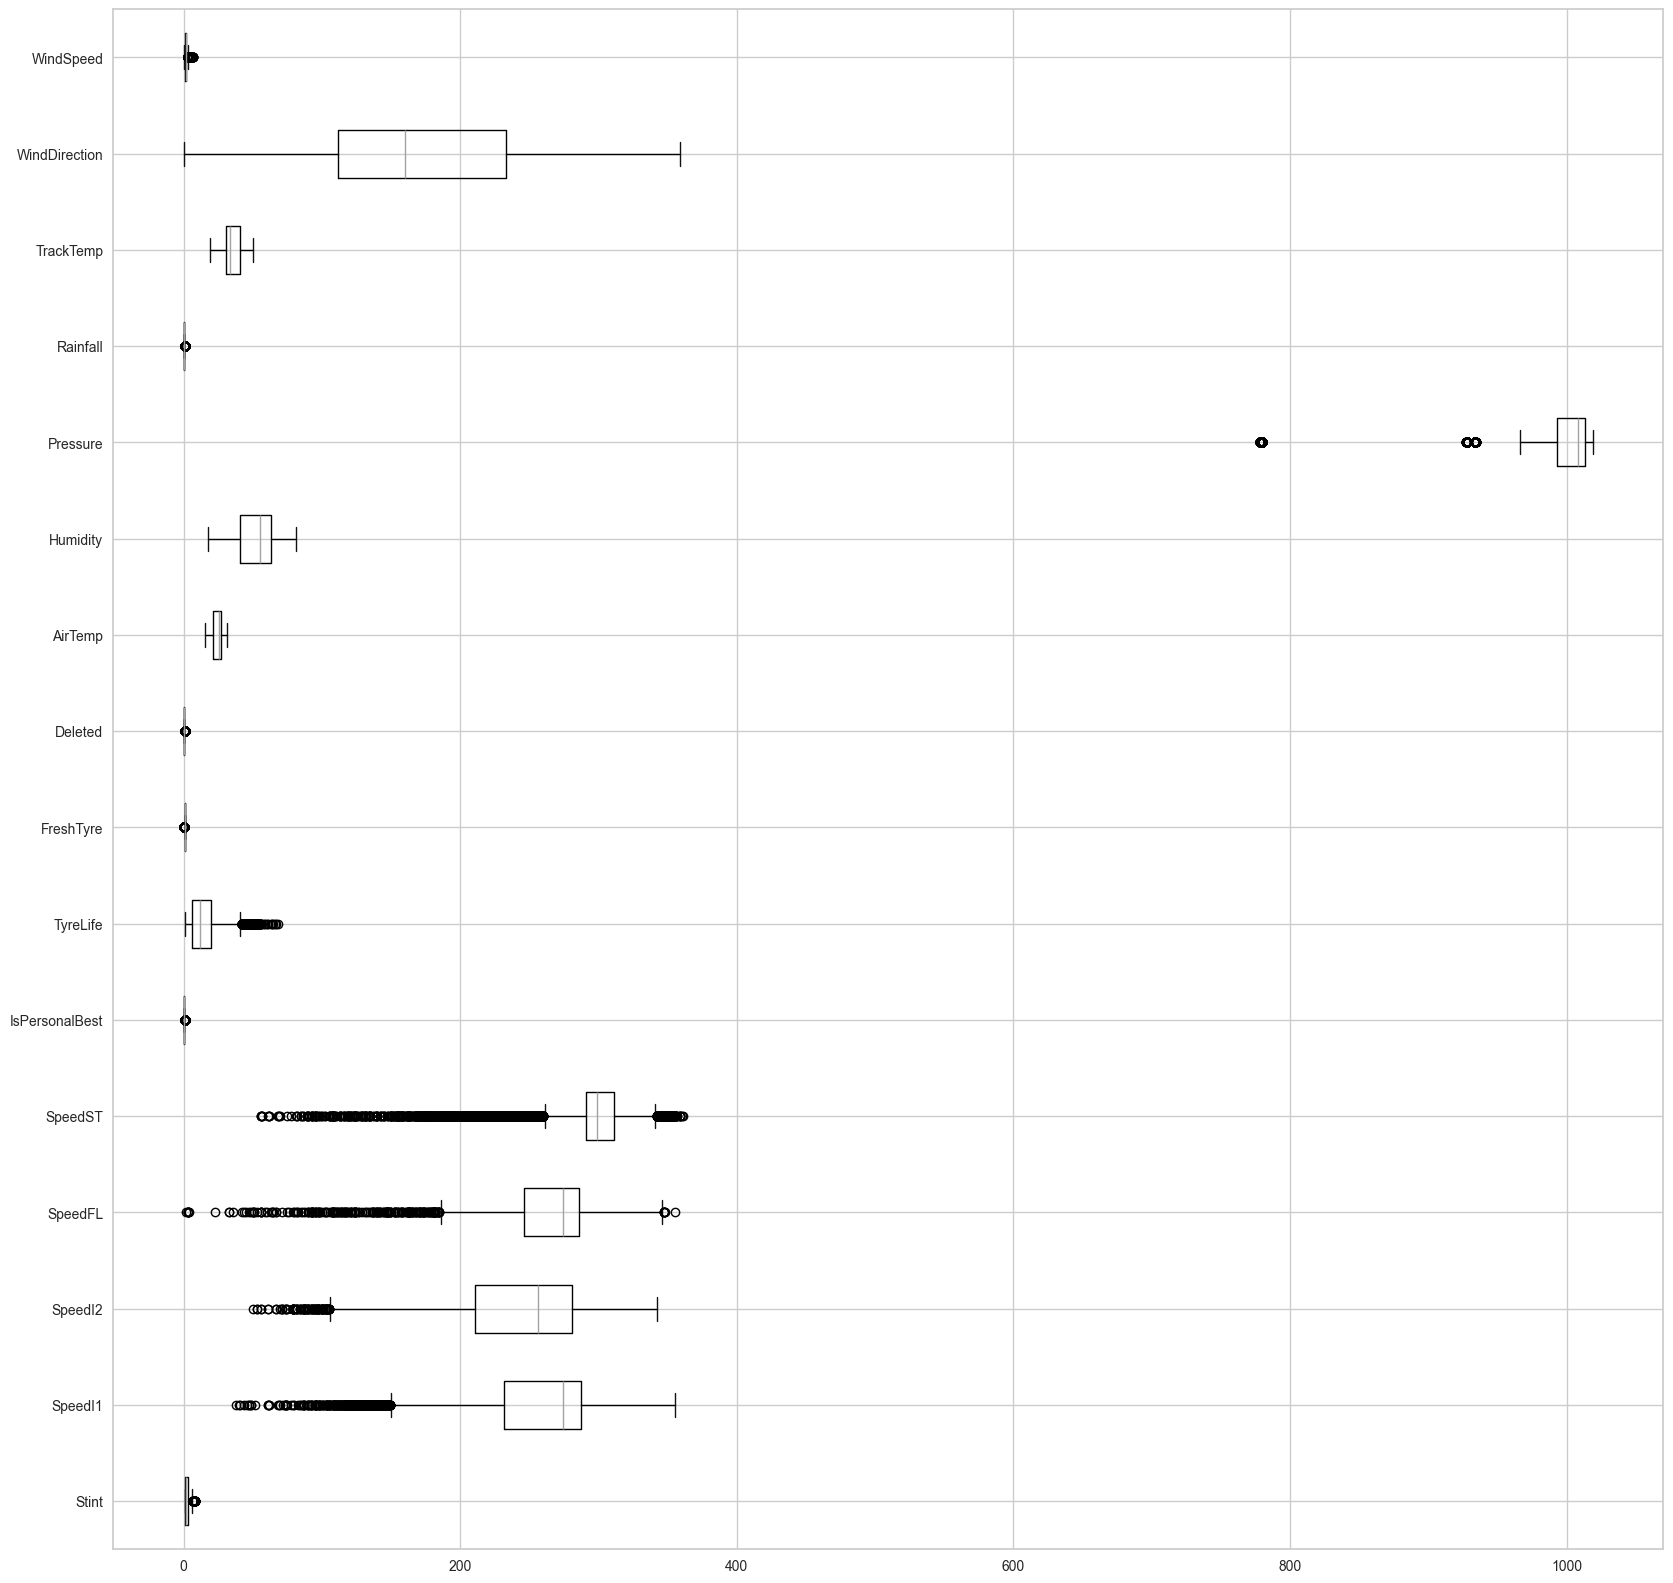

In [150]:
f1_data.boxplot(vert=False,figsize=(20,20))
plt.show()

In [151]:
laptime_numerical = f1_data.select_dtypes(include=['float64', 'int64']) 
Q1 = laptime_numerical.quantile(0.25)
Q3 = laptime_numerical.quantile(0.75)
IQR = Q3 - Q1

In [152]:
print(cek_outlier(f1_data))

Persentase Outlier pada tiap atribut:
Stint             0.298078
SpeedI1           2.746580
SpeedI2           0.548251
SpeedFL           1.320062
SpeedST           7.260340
TyreLife          1.948156
AirTemp           0.000000
Humidity          0.000000
Pressure         15.824772
TrackTemp         0.000000
WindDirection     0.000000
WindSpeed         8.026827
dtype: float64
None


> Atribut `Presure` digunakan untuk memprediksi `TyreLife`, sehingga tidak kami drop .

### Encoding Categorical Attributes

In [153]:
print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
print('#'*70)
print()
for col in f1_data.select_dtypes(include=object).columns:
    print(col, f": {len(f1_data[col].unique())}", f1_data[col].unique())
    print("\n")

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
######################################################################

Time : 18744 ['0 days 02:26:25.496000' '0 days 01:13:51.732000'
 '0 days 02:22:35.139000' ... '0 days 02:00:31.678000'
 '0 days 01:07:59.947000' '0 days 02:04:03.127000']


LapTime : 14761 ['0 days 00:01:40.943000' '0 days 00:01:48.067000'
 '0 days 00:01:22.881000' ... '0 days 00:01:25.235000'
 '0 days 00:01:52.495000' '0 days 00:02:25.892000']


Sector1Time : 11540 ['0 days 00:00:46.163000' '0 days 00:00:39.129000'
 '0 days 00:00:28.890000' ... '0 days 00:01:06.782000'
 '0 days 00:00:30.620000' '0 days 00:00:52.231000']


Sector2Time : 12067 ['0 days 00:00:28.979000' '0 days 00:00:43.601000'
 '0 days 00:00:18.554000' ... '0 days 00:01:09.507000'
 '0 days 00:00:49.567000' '0 days 00:00:53.937000']


Sector3Time : 10711 ['0 days 00:00:25.801000' '0 days 00:00:25.337000'
 '0 days 00:00:35.437000' ... '0 days 00:00:21.484000'
 '0 days 00:00:28.037000

In [154]:
f1_data['Compound'] = f1_data['Compound'].map({'INTERMEDIATE':1, 'MEDIUM':4, 'HARD':2, 'SOFT':3, 'WET':0})
f1_data['Pos_cat'] = f1_data['Pos_cat'].map({'Participant':0, 'Podium':2, 'Point':1})

In [155]:
def zero_days_remover (duration):
    return duration.replace('0 days ', '')

In [156]:
time_att = []
for col in f1_data.select_dtypes(include=object).columns:
    time_att.append(col)

In [157]:
time_att

['Time',
 'LapTime',
 'Sector1Time',
 'Sector2Time',
 'Sector3Time',
 'Sector1SessionTime',
 'Sector2SessionTime',
 'Sector3SessionTime',
 'LapStartTime']

In [158]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(zero_days_remover)

Untuk memudahkan encoding waktu, kami menghilangkan 0 days karena seluruh data memiliki 0 days dan hal tersebut tidak membantu kami dalam melakukan encoding waktu

In [159]:
def time_converter (time_str):
    if '.' in time_str:
        time_str, milliseconds = time_str.split('.')
        milliseconds = int(milliseconds)
    else:
        milliseconds = 0

    x_time = datetime.datetime.strptime(time_str, '%H:%M:%S')

    total_seconds = datetime.timedelta(
        hours=x_time.hour,
        minutes=x_time.minute,
        seconds=x_time.second,
        microseconds=milliseconds / 1000  # Convert milliseconds to microseconds
    ).total_seconds()
    
    return total_seconds

In [160]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(time_converter)

In [161]:
f1_data

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,LapStartTime,Deleted,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,8785.000496,100.000943,6.0,46.000163,28.000979,25.000801,8736.000926,8765.000905,8791.000706,283.0,...,8684.000553,False,17.1,68.0,1008.0,False,24.8,157,3.0,0
1,4431.000732,108.000067,1.0,39.000129,43.000601,25.000337,4362.000794,4406.000395,4431.000732,199.0,...,4323.000665,False,25.0,49.0,1008.5,False,43.3,275,1.0,2
2,8555.000139,82.000881,2.0,28.000890,18.000554,35.000437,8501.000150,8519.000704,8555.000141,275.0,...,8472.000258,False,17.6,57.0,1018.2,False,29.9,0,0.6,0
3,3816.000822,91.000585,1.0,28.000315,28.000929,30.000478,3898.000279,3786.000412,3816.000927,266.0,...,3724.000960,False,17.6,67.0,1007.7,False,29.5,135,1.8,2
4,6340.000072,94.000742,2.0,34.000895,29.000874,29.000973,6280.000174,6310.000048,6340.000021,274.0,...,6245.000330,False,26.1,55.0,1011.0,False,31.0,271,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,5220.000913,85.000235,2.0,30.000620,30.000668,23.000947,5166.000294,5196.000962,5220.000909,276.0,...,5135.000678,False,29.3,32.0,988.4,False,49.9,252,1.2,0
18784,4892.000309,100.000363,1.0,29.000488,42.000838,28.000037,4821.000469,4864.000307,4892.000344,297.0,...,4791.000946,False,30.0,72.0,1009.0,False,36.8,145,1.1,0
18785,7231.000678,112.000495,3.0,32.000659,49.000567,30.000269,7151.000871,7201.000438,7231.000707,309.0,...,7119.000183,False,17.6,66.0,966.7,False,30.3,146,1.1,0
18786,4079.000947,85.000938,1.0,30.000564,31.000370,24.000004,4024.000556,4055.000926,4079.000930,256.0,...,3994.000009,False,28.8,33.0,988.5,False,50.1,134,1.5,0


In [162]:
boolean_columns = ['IsPersonalBest', 'FreshTyre', 'Deleted', 'Rainfall']
f1_data = pd.get_dummies(f1_data, columns = boolean_columns, drop_first=True) 
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18787 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 18787 non-null  float64
 1   LapTime              18787 non-null  float64
 2   Stint                18787 non-null  float64
 3   Sector1Time          18787 non-null  float64
 4   Sector2Time          18787 non-null  float64
 5   Sector3Time          18787 non-null  float64
 6   Sector1SessionTime   18787 non-null  float64
 7   Sector2SessionTime   18787 non-null  float64
 8   Sector3SessionTime   18787 non-null  float64
 9   SpeedI1              18787 non-null  float64
 10  SpeedI2              18787 non-null  float64
 11  SpeedFL              18787 non-null  float64
 12  SpeedST              18787 non-null  float64
 13  Compound             18787 non-null  int64  
 14  TyreLife             18787 non-null  float64
 15  LapStartTime         18787 non-null  floa

# **EKSPLORASI** 

Apakah penggunaan ‘Compound’ yang berbeda berpengaruh terhadap performa? 


>Performa dari suatu mobil F1 dapat ditentukan melalui waktu yang ditempuh mobil tersebut selama satu lap, yaitu atribut `LapTime`. Atribut ini juga kami pilih sebagai representasi performa yang dianalisis pengaruhnya oleh `Compound` karena dalam balapan F1, tipe compound yang berbeda tidak mungkin dipakai dalam satu lap yang sama. Oleh karena itu pada eksplorasi ini kami hanya mengambil atribut `Compound` dan `LapTime`

In [163]:
compount_influence = f1_data.copy()

In [164]:
compount_influence = compount_influence[['Compound', 'LapTime']]
compount_influence

,Compound,LapTime
0,1,100.000943
1,4,108.000067
2,2,82.000881
3,3,91.000585
4,2,94.000742
...,...,...
18783,2,85.000235
18784,4,100.000363
18785,3,112.000495
18786,2,85.000938


In [165]:
compount_influence['Compound'] = compount_influence['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})
compount_influence

,Compound,LapTime
0,INTERMEDIATE,100.000943
1,MEDIUM,108.000067
2,HARD,82.000881
3,SOFT,91.000585
4,HARD,94.000742
...,...,...
18783,HARD,85.000235
18784,MEDIUM,100.000363
18785,SOFT,112.000495
18786,HARD,85.000938


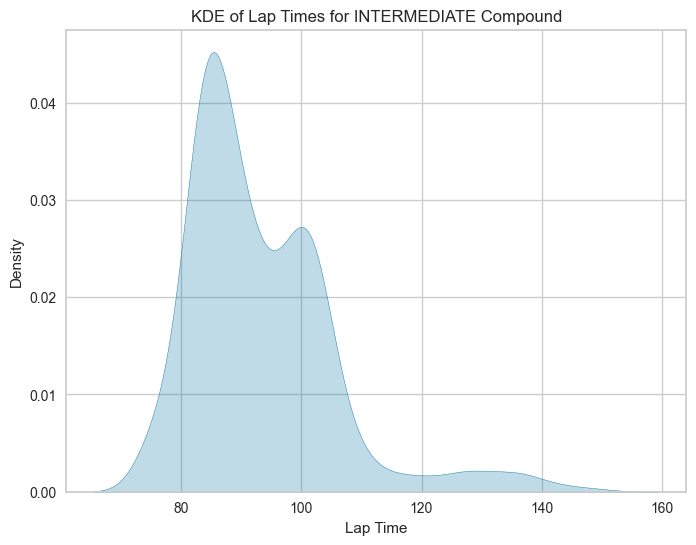

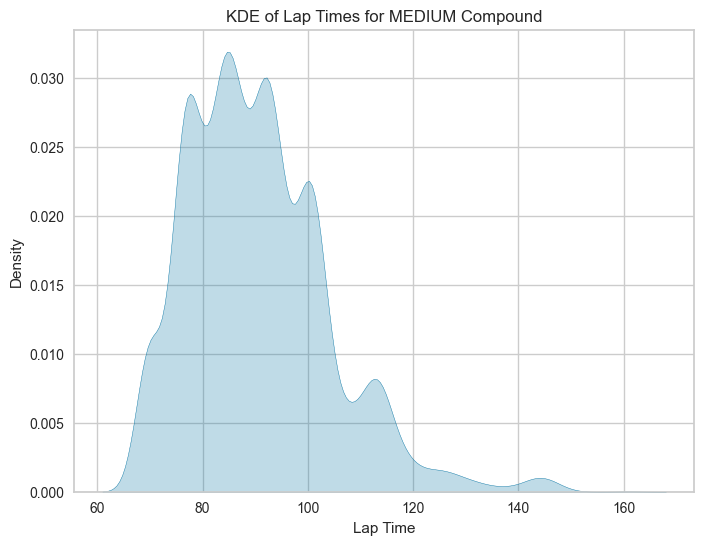

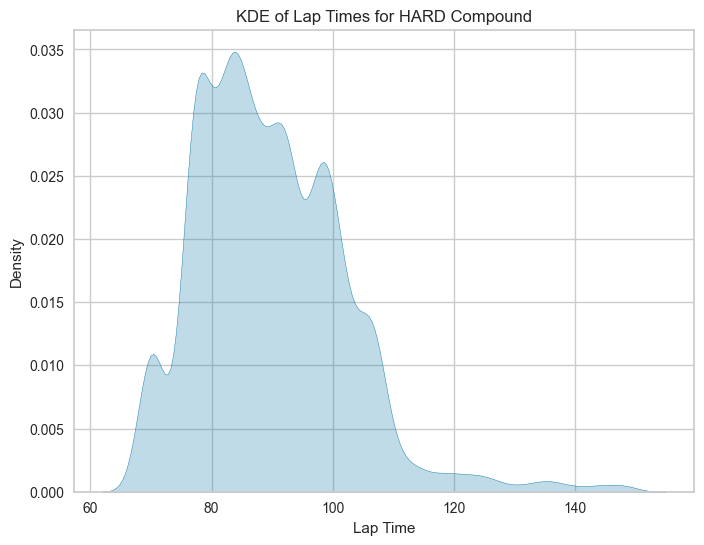

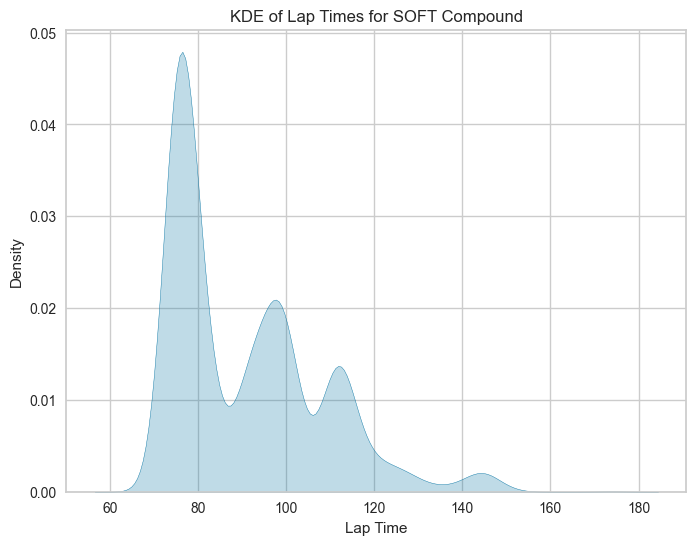

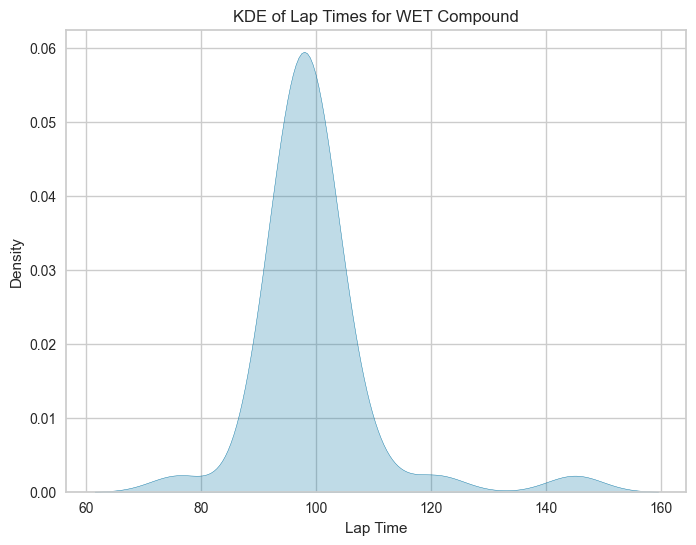

In [166]:
compounds = compount_influence['Compound'].unique()
for compound in compounds:
    plt.figure(figsize=(8, 6))
    subset = compount_influence[compount_influence['Compound'] == compound]['LapTime']
    sns.kdeplot(subset, fill=True)
    plt.title(f'KDE of Lap Times for {compound} Compound')
    plt.xlabel('Lap Time')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

>Berdasarkan KDE plot untuk masing-masing tipe `Compound` terhadap `LapTime`, dapat diketahui bahwa semua tipe `Coumpound` memiliki distribusi positive-skewed. Dengan begitu, central tendency yang dapat digunakan dalam melakukan analisis perbandingan `Compound` terhadap performa mobil F1 berdasarkan `LapTime` adalah **median**.

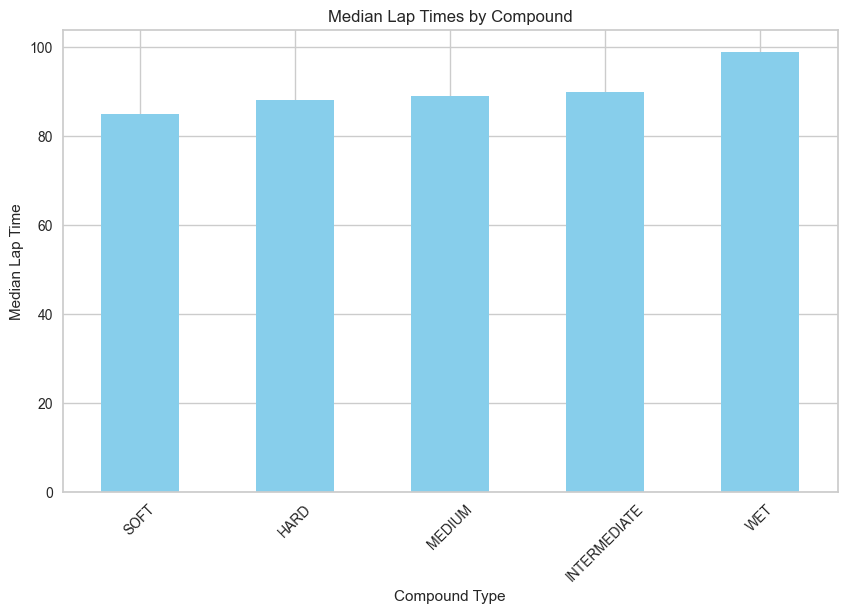

In [167]:
median_laptimes = compount_influence.groupby('Compound')['LapTime'].median()
median_laptimes = median_laptimes.sort_values()
median_laptimes.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Median Lap Times by Compound')
plt.xlabel('Compound Type')
plt.ylabel('Median Lap Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

> Grafik diatas adalah grafik yang menampilkan median `LapTime` dari setiap `Compound` dan diurutkan dari `LapTime` paling cepat hingga `LapTime` paling lambat

>Berdasarkan visualisasi diatas, dapat dianalisis bahwa setiap tipe `Compound` dapat mempengaruhi performa mobil F1 karena menghasilkan `LapTime` yang berbeda-beda. Performa terbaik didapatkan ketika mobil-mobil F1 menggunakan `Compound` bertipe **SOFT**. Lalu, diikuti dengan tipe  `Compound` **HARD, MEDIUM, & INTERMEDIATE** untuk performa terbaik kedua, ketiga, dan keempat. Untuk performa terburuk, didapatkan ketika mobil F1 menggunakan tipe `Compound` **WET**.

Bagaimana ciri-ciri driver dengan kategori posisi ‘Pos_cat’ Podium dibandingkan dengan kategori posisi lainnya?


Analisis perbedaan ketika sirkuit hujan ‘Rainfall’ atau tidak


Adakah rentang umur ban ‘TyreLife’ dengan performa terbaik dibandingkan rentang umur ban lainnya?


# **REGRESI**

In [168]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [169]:
# Kalo butuh feature selection
# mi = mutual_info_regression(X_regression, y_regression)
# mi = pd.Series(mi)
# mi.index = X_regression.columns
# mi.sort_values(ascending=False)

# KBest = math.ceil(0.1 * len(mi.index))

# selector = SelectKBest(f_classif, k=KBest) 
# X_regression = selector.fit_transform(X_regression, y_regression)
# input_features = selector.feature_names_in_
# selector.get_feature_names_out(input_features=input_features)

#### Decision Tree

In [246]:
# Split Dataset Klasifikasi
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [247]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

In [248]:
# Decision Tree 
dtr_f1 = DecisionTreeRegressor()
dtr_f1.fit(X_regress_train, y_regress_train)

DecisionTreeRegressor()

In [249]:
predicted_dtr = dtr_f1.predict(X_regress_test)
regression_metrics(predicted_dtr, y_regress_test)

MAE: 2.2325705162320384
MSE: 19.792620188043287
RMSE: 4.448889770273398
R_squared: 0.8108565516796508


In [174]:
#Random Forest

#### Linear Regression

In [254]:
# Split Dataset Klasifikasi
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [255]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

In [256]:
#Standarisasi
scaler = MinMaxScaler()

X_regress_train = scaler.fit_transform(X_regress_train)
X_regress_test = scaler.transform(X_regress_test)

In [257]:
linear_f1 = LinearRegression()
linear_f1.fit(X_regress_train, y_regress_train)

LinearRegression()

In [258]:
predicted_lin = linear_f1.predict(X_regress_test)

regression_metrics(predicted_lin, y_regress_test)

MAE: 5.195173776265599
MSE: 47.17918325669323
RMSE: 6.868710450782827
R_squared: 0.5491434016654648


# **KLASIFIKASI**

Klasifikasi digunakan untuk membuat model dengan target `Pos_cat`

In [194]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

def classification_metrics(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print(f'Accuracy: {accuracy_score(y_test, prediction)}')
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [181]:
#Kalo butuh feature Selection
# mi = mutual_info_classif(X_classification, y_classification)
# mi = pd.Series(mi)
# mi.index = X_classification.columns
# mi.sort_values(ascending=False)

# KBest = math.ceil(0.2 * len(mi.index))

# selector = SelectKBest(f_classif, k=KBest) 
# X_classification = selector.fit_transform(X_classification, y_classification)
# input_features = selector.feature_names_in_
# selector.get_feature_names_out(input_features=input_features)

### Model Decision Tree

#### Decision Tree

In [233]:
# Split dan seleksi fitur Dataset Klasifikasi
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [234]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [236]:
# Decision Tree
dtc_f1 = DecisionTreeClassifier()
dtc_f1.fit(X_class_train, y_class_train)

DecisionTreeClassifier()

In [237]:
predicted_dtc = dtc_f1.predict(X_class_test)
classification_metrics(predicted_dtc, y_class_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2589
           1       0.65      0.67      0.66      2133
           2       0.63      0.62      0.62       915

    accuracy                           0.71      5637
   macro avg       0.69      0.69      0.69      5637
weighted avg       0.71      0.71      0.71      5637



Confusion Matrix



prediction,0,1,2
actual,,,
0,2010,489,90
1,463,1426,244
2,84,265,566




Accuracy: 0.7099521021820117
F1 Macro Average: 0.6887124663902752
F1 Micro Average: 0.7099521021820117
Precision Macro Average: 0.6896982545831363
Precision Micro Average: 0.7099521021820117
Recall Macro Average: 0.6878275747339887
Recall Micro Average: 0.7099521021820117



In [187]:
# Random Forest

In [188]:
# Decision Tree Hyperparameter

In [189]:
# Random Forest Hyperparameter

#### Neural Network

In [264]:
# Split dan seleksi fitur Dataset Klasifikasi
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [265]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [266]:
#Standarisasi
scaler = MinMaxScaler()

X_class_train = scaler.fit_transform(X_class_train)
X_class_test = scaler.transform(X_class_test)

In [267]:
# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-4,
    hidden_layer_sizes=(50, 25, 10),
    solver='sgd',
    learning_rate_init=0.01,   
    random_state=42,
    activation='tanh'
)

mlp_classifier.fit(X_class_train, y_class_train)

c:\Users\Rizky Prawira N\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 25, 10),
              learning_rate_init=0.01, random_state=42, solver='sgd')

In [268]:
predicted_nn = mlp_classifier.predict(X_class_test)
classification_metrics(predicted_nn, y_class_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      2589
           1       0.52      0.64      0.57      2133
           2       0.49      0.37      0.42       915

    accuracy                           0.60      5637
   macro avg       0.58      0.55      0.56      5637
weighted avg       0.61      0.60      0.60      5637



Confusion Matrix



prediction,0,1,2
actual,,,
0,1697,798,94
1,519,1362,252
2,106,474,335




Accuracy: 0.6020933120454143
F1 Macro Average: 0.5607765596030393
F1 Micro Average: 0.6020933120454143
Precision Macro Average: 0.5799478036043181
Precision Micro Average: 0.6020933120454143
Recall Macro Average: 0.5533743068987035
Recall Micro Average: 0.6020933120454143



### Clustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

In [299]:
data_clustering = f1_data.copy()

In [300]:
data_clustering = pd.DataFrame(MinMaxScaler().fit_transform(data_clustering), columns=data_clustering.keys())
data_clustering.head()

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Pos_cat,IsPersonalBest_True,FreshTyre_True,Deleted_True,Rainfall_True
0,0.548426,0.308418,0.714286,0.374992,0.171880,0.108433,0.548006,0.550958,0.549144,0.772871,...,0.793651,0.955454,0.185897,0.437326,0.454545,0.0,0.0,0.0,0.0,0.0
1,0.070857,0.383176,0.000000,0.287491,0.406248,0.108427,0.060815,0.071208,0.070864,0.507886,...,0.492063,0.957535,0.778846,0.766017,0.151515,1.0,0.0,1.0,0.0,0.0
2,0.523198,0.140194,0.142857,0.150001,0.015624,0.228910,0.521831,0.523883,0.523256,0.747634,...,0.619048,0.997918,0.349359,0.000000,0.090909,0.0,1.0,1.0,0.0,0.0
3,0.003400,0.224303,0.000000,0.149994,0.171879,0.168670,0.009133,0.002972,0.003401,0.719243,...,0.777778,0.954205,0.336538,0.376045,0.272727,1.0,0.0,1.0,0.0,0.0
4,0.280246,0.252342,0.142857,0.225001,0.187503,0.156628,0.274449,0.280762,0.280276,0.744479,...,0.587302,0.967943,0.384615,0.754875,0.196970,0.5,0.0,1.0,0.0,0.0


#### Hierarchical Clustering

>Pada dataset terdapat beberapa fitur yang terkait dengan waktu seperti `Time`, `Sector1SessionTime`, `Sector2SessionTime`, `Sector3SessionTime`, dan `LapStartTime` dan fitur-fitur tersebut redundan terhadap fitur terkait durasi seperti `LapTime`, `Sector1Time`, `Sector2Time`, dan `Sector3Time` karena keduanya memberikan informasi yang sama, yaitu peraihan yang didapatkan oleh pembalap F1. Oleh karena itu, fitur-fitur terkait waktu dapat di drop.

In [301]:
data_clustering = data_clustering.drop(axis=1, columns=['Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'LapStartTime'])

In [302]:
variance_of_data = data_clustering.var().sort_values()
print(f"Varians dari setiap fitur di dataset:\n{variance_of_data}")

Varians dari setiap fitur di dataset:
Sector3Time            0.005897
Sector1Time            0.009602
SpeedST                0.009687
SpeedFL                0.010300
Sector2Time            0.015190
LapTime                0.016181
Deleted_True           0.016281
SpeedI1                0.018767
WindSpeed              0.022358
TyreLife               0.023232
Stint                  0.023467
SpeedI2                0.026196
Rainfall_True          0.028470
TrackTemp              0.044689
Pressure               0.052607
Humidity               0.056221
Compound               0.057434
WindDirection          0.064505
AirTemp                0.075354
Pos_cat                0.133457
IsPersonalBest_True    0.151332
FreshTyre_True         0.180854
dtype: float64


>Clustering akan dapat menghasilkan cluster yang berbeda-beda secara signifikan apabila fitur-fiturnya memiliki varians atau persebaran data yang cukup besar. Oleh karena itu, pada dataset ini, kami melakukan drop untuk fitur yang memiliki varians rendah. Setelah melakukan standarisasi pada dataset, kami telah menghitung varians untuk setiap fitur dan memutuskan untuk melakukan drop kepada fitur dengan varians < 0,02.

In [303]:
low_variance_features = variance_of_data[variance_of_data < 0.02].index.tolist()
data_clustering = data_clustering.drop(low_variance_features, axis=1)

In [304]:
data_clustering.corr()

,Stint,SpeedI2,Compound,TyreLife,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Pos_cat,IsPersonalBest_True,FreshTyre_True,Rainfall_True
Stint,1.000000,0.053466,-0.193691,-0.007387,-0.251986,0.128419,-0.145666,-0.159279,-0.069546,-0.082578,-0.087680,-0.124177,-0.141652,0.100748
SpeedI2,0.053466,1.000000,0.040422,0.061460,0.025079,0.018915,-0.058540,-0.040142,0.268585,-0.209494,0.019590,0.050679,-0.067905,-0.212736
Compound,-0.193691,0.040422,1.000000,-0.168629,0.013628,0.012544,-0.154286,0.148930,-0.018787,0.052185,0.069714,0.056143,0.009833,-0.156174
TyreLife,-0.007387,0.061460,-0.168629,1.000000,-0.030703,-0.026894,-0.021380,-0.035380,-0.012430,0.017933,0.074799,-0.166588,-0.084142,-0.090224
AirTemp,-0.251986,0.025079,0.013628,-0.030703,1.000000,-0.337623,0.036300,0.537780,-0.065022,-0.052675,0.000660,0.007780,-0.025993,-0.196955
Humidity,0.128419,0.018915,0.012544,-0.026894,-0.337623,1.000000,0.418244,-0.504658,-0.057728,0.195173,0.001388,0.053373,0.143275,0.133344
Pressure,-0.145666,-0.058540,-0.154286,-0.021380,0.036300,0.418244,1.000000,-0.407644,-0.126048,0.105041,-0.011342,0.065624,0.160719,0.055406
TrackTemp,-0.159279,-0.040142,0.148930,-0.035380,0.537780,-0.504658,-0.407644,1.000000,-0.023040,-0.101841,0.015882,0.016363,-0.174720,-0.223542
WindDirection,-0.069546,0.268585,-0.018787,-0.012430,-0.065022,-0.057728,-0.126048,-0.023040,1.000000,-0.017710,0.001265,-0.005287,-0.002096,-0.044077
WindSpeed,-0.082578,-0.209494,0.052185,0.017933,-0.052675,0.195173,0.105041,-0.101841,-0.017710,1.000000,-0.011009,0.006033,0.073774,-0.003406


In [305]:
agglomerative_temp = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarichal_assignment = agglomerative_temp.fit(data_clustering)

hierarichal_assignment.labels_

array([13454, 16713, 10212, ...,     5,     2,     0], dtype=int64)

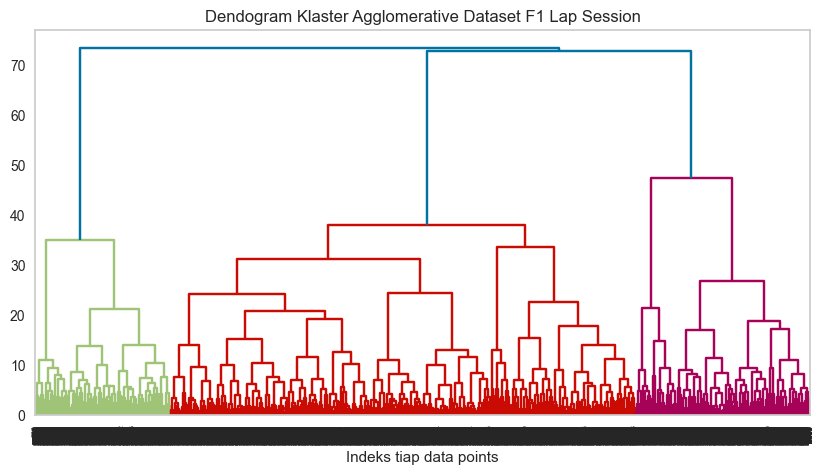

In [306]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative_temp, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset F1 Lap Session")
plt.xlabel("Indeks tiap data points")
plt.show()

> Dapat terilhat pada Dendogram diatas, garis biru merupakan garis terpanjang dan memiliki perbedaan yang signifikan dibandingkan garis warna lainnya, hal ini menandakan jumlah k untuk clustering yang optimal adalah sebanyak k=3 sesuai dengan jumlah garis vertikal pada garis biru.

In [307]:
agglomerative_f1 = AgglomerativeClustering(n_clusters=3)
hierarichal_assignment_fix = agglomerative_f1.fit_predict(data_clustering)

In [308]:
result_agg_cluster = pd.DataFrame(data_clustering.copy())
result_agg_cluster['cluster'] = hierarichal_assignment_fix
result_agg_cluster.head()

,Stint,SpeedI2,Compound,TyreLife,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Pos_cat,IsPersonalBest_True,FreshTyre_True,Rainfall_True,cluster
0,0.714286,0.726027,0.25,0.104478,0.088608,0.793651,0.955454,0.185897,0.437326,0.454545,0.0,0.0,0.0,0.0,0
1,0.000000,0.530822,1.00,0.074627,0.588608,0.492063,0.957535,0.778846,0.766017,0.151515,1.0,0.0,1.0,0.0,2
2,0.142857,0.825342,0.50,0.492537,0.120253,0.619048,0.997918,0.349359,0.000000,0.090909,0.0,1.0,1.0,0.0,1
3,0.000000,0.712329,0.75,0.000000,0.120253,0.777778,0.954205,0.336538,0.376045,0.272727,1.0,0.0,1.0,0.0,2
4,0.142857,0.856164,0.50,0.119403,0.658228,0.587302,0.967943,0.384615,0.754875,0.196970,0.5,0.0,1.0,0.0,2


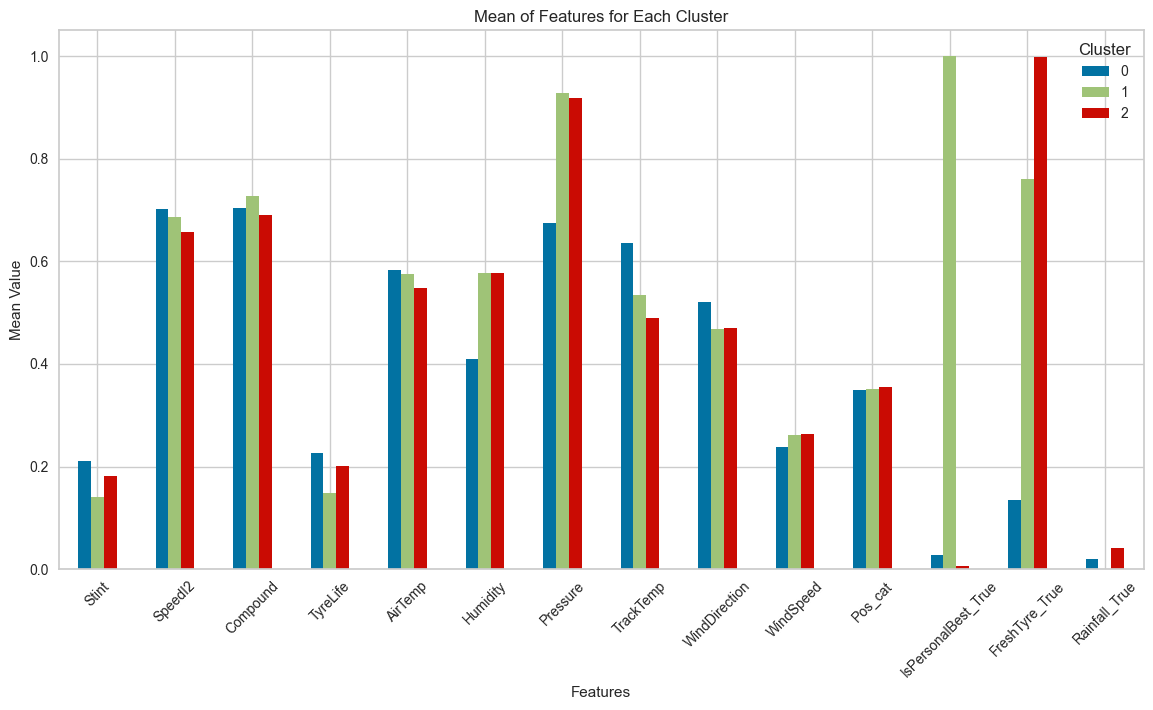

In [313]:
cluster_means = result_agg_cluster.groupby('cluster').mean()

# Plotting
cluster_means.T.plot(kind='bar', figsize=(14, 7))  # Transpose to have features as rows and clusters as columns
plt.title('Mean of Features for Each Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.legend(title='Cluster', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()